<a href="https://colab.research.google.com/github/Ayanlola2002/DATA-SCIENCE-PROJECTS/blob/master/Dphi_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import pandas as pd
import numpy as np
import datetime
 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,f1_score
import warnings
warnings.filterwarnings('ignore')

In [106]:
train_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Heart_Disease/Training_set_heart.csv" )
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Heart_Disease/Testing_set_heart.csv')

In [107]:
train_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,48,1,2,124,255,1,1,175,0,0.0,2,2,2,1
1,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
2,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
3,60,1,0,130,253,0,1,144,1,1.4,2,1,3,0
4,43,1,0,115,303,0,1,181,0,1.2,1,0,2,1


In [108]:
train_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [109]:
test_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [110]:
train_data.skew()

age        -0.268034
sex        -0.820789
cp          0.535785
trestbps    0.571733
chol        1.302705
fbs         1.817011
restecg     0.141633
thalach    -0.474609
exang       0.727326
oldpeak     1.249342
slope      -0.588684
ca          1.224102
thal       -0.634908
target     -0.171644
dtype: float64

In [111]:
train_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,54.561321,0.688679,0.915094,132.127358,247.830189,0.165094,0.537736,148.995283,0.330189,1.008491,1.448113,0.783019,2.320755,0.542453
std,9.493376,0.464130,1.008193,17.440700,53.199877,0.372144,0.527437,23.332645,0.471394,1.141681,0.601850,1.066551,0.646495,0.499374
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.750000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,57.000000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,151.500000,0.000000,0.650000,2.000000,0.000000,2.000000,1.000000
75%,61.250000,1.000000,2.000000,140.000000,277.000000,0.000000,1.000000,165.250000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,192.000000,564.000000,1.000000,2.000000,202.000000,1.000000,5.600000,2.000000,4.000000,3.000000,1.000000


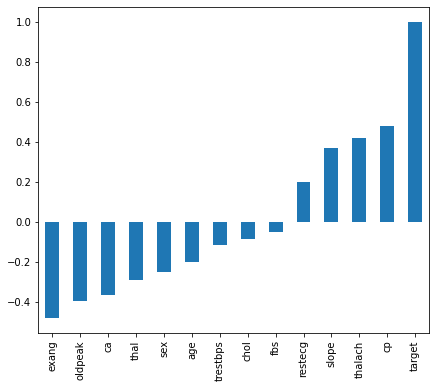

In [112]:
#checking features that correllate with target
train_data.corr()['target'].sort_values().plot(kind='bar', figsize=(7, 6))

In [113]:
s=train_data.iloc[:, (np.where((train_data.dtypes == np.int64) | (train_data.dtypes == np.float64)))[0]].columns

In [114]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       212 non-null    int64  
 1   sex       212 non-null    int64  
 2   cp        212 non-null    int64  
 3   trestbps  212 non-null    int64  
 4   chol      212 non-null    int64  
 5   fbs       212 non-null    int64  
 6   restecg   212 non-null    int64  
 7   thalach   212 non-null    int64  
 8   exang     212 non-null    int64  
 9   oldpeak   212 non-null    float64
 10  slope     212 non-null    int64  
 11  ca        212 non-null    int64  
 12  thal      212 non-null    int64  
 13  target    212 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 23.3 KB


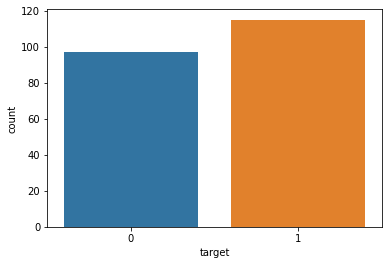

In [115]:
#target distribution
sns.countplot(train_data.target)
#Surely not an inbalance challenge

In [116]:
#save and drop target varriable
y = train_data.target
train_data = train_data.drop("target", axis = 1)

In [117]:
#Feature Engineering/ merging train and test data
data=train_data.append(test_data)

In [118]:
#checking for nans
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [119]:
# Feature binning for age
from sklearn.preprocessing import KBinsDiscretizer
age_discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')

data['Age_Bins'] =age_discretizer.fit_transform(data['age'].values.reshape(-1,1)).astype(int)

In [120]:
data.drop('age',axis=1,inplace=True)

In [121]:
data.shape

(303, 13)

In [122]:
#splitting back into train and test sets
train=data.iloc[:212,]
test= data.iloc[212:,]

In [123]:
train.shape,test.shape

((212, 13), (91, 13))

In [124]:
X=train.copy()

In [125]:
#Splitting data into train data into train and validation sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [126]:
X_train_copy=X_train.copy()

In [127]:
#Model definition Forest
from xgboost.sklearn import XGBClassifier
#from sklearn.feature_selection import RFE
#forest_rfe = RandomForestClassifier(random_state=1)
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)
#forest=RandomForestClassifier(random_state=1)

In [128]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [129]:
# Grid search cv
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator =xgb, param_grid = params, cv = 3, n_jobs = -1, verbose = 2)

In [130]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 405 candidates, totalling 1215 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 292 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 698 tasks      | elapsed:   34.7s
[Parallel(n_jobs=-1)]: Done 1215 out of 1215 | elapsed:  1.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.02, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=600, n_jobs=1,
                                     nthread=1, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=True,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 1.5, 2, 5], 'max_depth': [3, 4, 5],
                         'min_child_weig

In [131]:
grid_search.best_params_

{'colsample_bytree': 0.6,
 'gamma': 5,
 'max_depth': 3,
 'min_child_weight': 5,
 'subsample': 0.6}

In [132]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1,colsample_bytree= 0.6,gamma= 5,max_depth= 3,
                    min_child_weight= 5,
                    subsample= 0.6)

In [133]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=5,
              learning_rate=0.02, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=None, n_estimators=600, n_jobs=1,
              nthread=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=0.6, verbosity=1)

In [134]:
#Predictions on the Test data
predictions_xgb = xgb.predict(X_test)

In [135]:
accuracy_score(y_test, predictions_xgb)

0.84375

In [136]:
f1_score(y_test, predictions_xgb)

0.8437500000000001

In [137]:
y_predictions_xgb=xgb.predict(test)

In [138]:
y_predictions_xgb

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1])

In [139]:
#Prepare our Submission file
my_submission = pd.DataFrame({'prediction': y_predictions_xgb })
my_submission.to_csv('submission_ayanlola_assign2.csv', index=False)